### Econometric analysis of factors affecting Life expectancy

- This project is done in the course ```Econometrics``` at IIT Palakkad
- This is a regression analysis of all factors affecting life expectancy
- Data is taken from Kaggle's WHO Life expectancy dataset
- [Kaggle link](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

### Testing kernel is working or not

In [62]:
print("Hello world")

Hello world


### Importing necessary libraries

In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [64]:
from sklearn.preprocessing import OrdinalEncoder

### Reading data into the notebook and analyzing it

In [65]:
df = pd.read_csv('../data/Life-Expectancy-Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [66]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### For the scope of this project, we focus only on a single year. In this case, we took 2015

In [67]:
df = df[df['Year'] == 2015]
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [68]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness  1-19 years                 2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64

### The cols: Alcohol, Total Expecditure are having a lot of null values. Dropping them entirely and year which is now constant

In [69]:
# df.fillna(df.mean())
df = df.drop(columns = ['Alcohol', 'Total expenditure', 'Year', 'Country'])

In [70]:
df.columns

Index(['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [71]:
df.isnull().sum()
# df

Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
percentage expenditure              0
Hepatitis B                         9
Measles                             0
BMI                                 2
under-five deaths                   0
Polio                               0
Diphtheria                          0
HIV/AIDS                            0
GDP                                29
Population                         41
thinness  1-19 years                2
thinness 5-9 years                  2
Income composition of resources    10
Schooling                          10
dtype: int64

### Handling null values

In [72]:
cols = [col for col in df.columns if df[col].isnull().sum()]
df[cols] = df[cols].fillna(df[cols].mean())

In [73]:
assert df.isnull().sum().sum() == 0

### Handling categorical cols using encoding (Ordinal Encoder)

In [74]:
catFeatCols = [col for col in df.columns if df[col].dtype == 'object']
# catFeatCols

catFeat  = df[catFeatCols]
catFeat

,Status
0,Developing
16,Developing
32,Developing
48,Developing
64,Developing
...,...
2858,Developing
2874,Developing
2890,Developing
2906,Developing


In [75]:
enc = OrdinalEncoder()

transMat = enc.fit_transform(catFeat)
# catFeat

# df['Country'] = transMat[:, 0]
df['Status'] = transMat[:, 0]

In [76]:
assert df.isnull().sum().sum() == 0

### Feature-target division 
- Features = independent variables or X variables
- Target = dependent variable

In [77]:
indVars = df.drop(columns=['Life expectancy'])
indVars

,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
16,1.0,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,1.0,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
48,1.0,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,1.0,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1.0,157.0,9,0.000000,87.0,0,62.1,10,87.0,87.0,0.1,7185.331746,1.109741e+07,1.6,1.5,0.769,14.3
2874,1.0,127.0,28,0.000000,97.0,256,17.5,35,97.0,97.0,0.1,7185.331746,1.109741e+07,14.2,14.5,0.678,12.6
2890,1.0,224.0,37,0.000000,69.0,468,41.3,47,63.0,69.0,0.1,7185.331746,1.109741e+07,13.6,13.4,0.499,9.0
2906,1.0,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5


<Axes: >

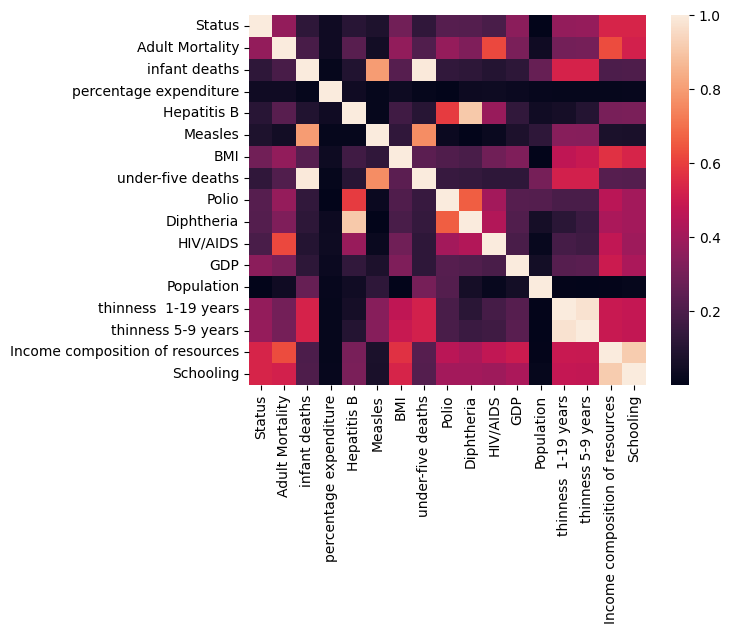

In [78]:
corr_matrix = indVars.corr().abs()
sns.heatmap(corr_matrix)

### Removing highly correlated columns

In [79]:
def getHighCorrCols(corr_matrix, threshold):
    cmarray = corr_matrix.to_numpy()
    
    highCorr = []

    for row in range(len(cmarray)):
        for col in range(row + 1, len(cmarray[row])):
            if cmarray[row, col] >= threshold:
                highCorr.append([row, col, cmarray[row , col]])

    # highCorr
    highCorrCols = []

    for (row, col, val) in highCorr:
        highCorrCols.append([corr_matrix.columns[row], corr_matrix.columns[col], val])

    highCorrCols = np.array(highCorrCols)
    return highCorrCols


In [80]:
getHighCorrCols(corr_matrix, 0.75)

array([['infant deaths', 'Measles', '0.8008588886733221'],
       ['infant deaths', 'under-five deaths', '0.9941957226943917'],
       ['Hepatitis B', 'Diphtheria', '0.9092357086886843'],
       ['Measles', 'under-five deaths', '0.7649082599579041'],
       ['thinness  1-19 years', 'thinness 5-9 years',
        '0.9731950250614151'],
       ['Income composition of resources', 'Schooling',
        '0.9175141973335061']], dtype='<U32')

In [81]:
# Decided to drop: 
# Hepatitis B (earlier null values are there)
# Schooling (high vaiance)
# infant deaths (twice the high corr)
# under five deaths
# thinness 5-9 years

indVars = indVars.drop(columns = ['Hepatitis B', 'thinness 5-9 years', 'Schooling', 'under-five deaths', 'infant deaths'])

In [82]:
features = indVars
target = df['Life expectancy']

<Axes: >

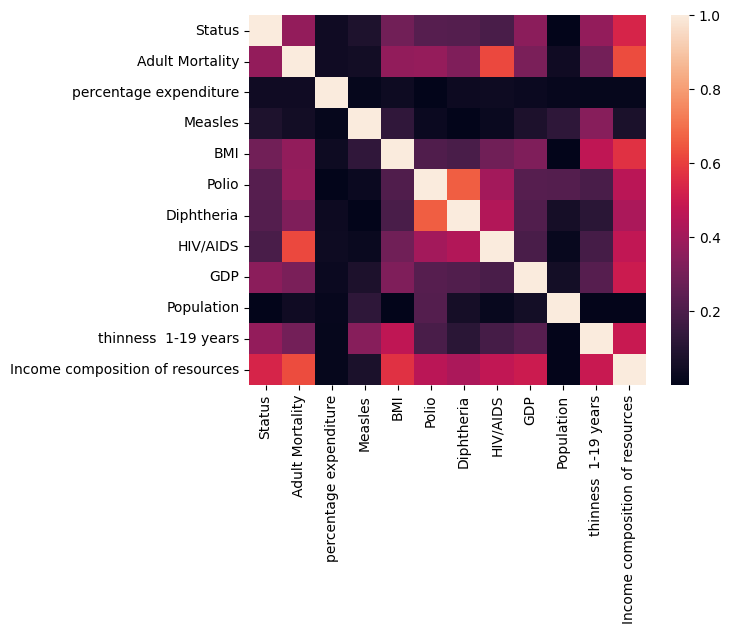

In [83]:
corr_matrix = features.corr().abs()
sns.heatmap(corr_matrix)

### Printing features and target (For a better understanding)

In [84]:
def print_features(features):
    for fIdx, feat in enumerate(features):
        print(f'X{fIdx + 1} = {feat}')

In [91]:
print("Y = Life expectancy")
print_features(features.columns)

Y = Life expectancy
X1 = Status
X2 = Adult Mortality
X3 = percentage expenditure
X4 = Measles
X5 = BMI
X6 = Polio
X7 = Diphtheria
X8 = HIV/AIDS
X9 = GDP
X10 = Population
X11 = thinness  1-19 years
X12 = Income composition of resources


### Using statsmodels api to get all the required results. Namely
1. estimated value
2. standard error
3. confidance interval
4. r2 score
5. t test

In [87]:
X = features
y = target

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     90.41
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           3.43e-67
Time:                        23:18:43   Log-Likelihood:                -459.60
No. Observations:                 183   AIC:                             945.2
Df Residuals:                     170   BIC:                             986.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.6533      2.367     23.508      0.000      50.980      60.327
Status                             -1.3676      0.733     -1.865      0.064      -2.815       0.080
Adult Mortality                    -0.0274      0.003     -7.889      0.000      -0.034      -0.021
percentage expenditure              0.0050      0.008      0.594      0.553      -0.012       0.022
Measles                          1.294e-05   3.18e-05      0.407      0.684   -4.98e-05    7.57e-05
BMI                                 0.0059      0.014      0.418      0.677      -0.022       0.034
Polio                               0.0123      0.014      0.903      0.368      -0.015       0.039
Diphtheria                          0.0379      0.015      2.593      0.010       0.009       0.067
HIV/AIDS                           -0.5227      0.234     -2.238      0.027      -0.984      -0.062
GDP                             -3.656e-06   2.51e-05     -0.146      0.884   -5.32e-05    4.59e-05
Population                      -5.499e-09   9.46e-09     -0.582      0.562   -2.42e-08    1.32e-08
thinness  1-19 years               -0.1558      0.073     -2.132      0.034      -0.300      -0.012
Income composition of resources    25.8762      2.757      9.386      0.000      20.434      31.318
==============================================================================
Omnibus:                       11.375   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.228
Skew:                          -0.381   Prob(JB):                     0.000299
Kurtosis:                       4.244   Cond. No.                     4.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
X.mean()

const                              1.000000e+00
Status                             8.251366e-01
Adult Mortality                    1.528634e+02
percentage expenditure             2.383906e+00
Measles                            1.502902e+03
BMI                                4.275414e+01
Polio                              8.320765e+01
Diphtheria                         8.463388e+01
HIV/AIDS                           6.606557e-01
GDP                                7.185332e+03
Population                         1.109741e+07
thinness  1-19 years               4.534807e+00
Income composition of resources    6.917399e-01
dtype: float64

In [89]:
X.std()

const                              0.000000e+00
Status                             3.808923e-01
Adult Mortality                    9.756118e+01
percentage expenditure             2.746103e+01
Measles                            7.842395e+03
BMI                                2.057173e+01
Polio                              2.424578e+01
Diphtheria                         2.216279e+01
HIV/AIDS                           1.344702e+00
GDP                                1.072515e+04
Population                         2.549218e+07
thinness  1-19 years               4.076838e+00
Income composition of resources    1.491377e-01
dtype: float64

In [90]:
y.mean()

np.float64(71.61693989071038)

In [92]:
y.std()

np.float64(8.123706147645304)